In [84]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

import pickle
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from nltk.stem import WordNetLemmatizer

In [166]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])  # 불용어처리

#  빈도수 높은 키워드 처리
stop_words.extend([ 'from', 'subject', 're', 'edu', 'use',' court', 'home',' council', 'hunter', 'help', 'time', 'injure', 'national', 'build', 'end', 'bid', 'cup', 'un', 'come', 'security', 'volunteer', 'ship', 'crew', 'crowd', 'join', 'helicopter', 'across', 'museum', 'Italy', 'grind', 'asian', 'sa', 'miss', 'one', 'die', 'use', 'three', 'Darwin', 'vic', 'number', 'may', 'start', 'law', 'way', 'communities', 'order', 'check', 'major', 'india', 'focus', 'form', 'journalist', 'milk', 'nz', 'rank', 'cook', 'egypt', 'New', 'year', 'force', 'fail', 'dead', 'was', 'farmer', 'fruit', 'philippines', 'injury', 'nick'])
stop_words.extend(['fire', 'new', 'hobart', 'rural', 'world', 'boat', 'turn', 'flight', 'around', 'well', 'Find', 'two', 'adelaide', 'murder', 'first', 'make', 'body', 'probe', 'outback', 'tourism', 'baby', 'David', 'street', 'mass', 'hotel', 'Police', 'say', 'open', 'dog', 'go', 'welcome', 'president', 'announce', 'level', 'allow', 'highest','queensland', 'kill', 'crash', 'road', 'record', 'nt', 'hit', 'plane', 'toll', 'suspend', 'peninsula', 'afghan', 'recovery','man', 'perth', 'flood', 'people', 'prison', 'still', 'supply', 'siege', 'spark', 'summer', 'Michael', 'ops', 'large', 'flash', 'view', 'attack', 'back', 'mine', 'deal', 'fan', 'celebrate', 'target', 'hill', 'party', 'reveal', 'terrorism', 'video', 'pressure', 'remember', 'korea', 'indian', 'millions', 'drill', 'country', 'hour', 'podcast', 'leaders', 'thursday', 'abbott', 'tony', 'policy', 'agricultural', 'shorten', 'sach', 'day', 'years', 'show', 'teen', 'heat', 'sport', 'issue', 'free', 'australias', 'asbestos', 'compete','South', 'china', 'talk', 'appeal', 'labor', 'plant', 'peter', 'allegedly', 'begin', 'try', 'ice', 'native', 'alcohol', 'Australia', 'league', 'live', 'launch', 'campaign', 'benefit', 'update', 'stream', 'cabinet', 'document', 'bob','Test', 'drug', 'brisbane', 'international', 'british', 'double', 'treat', 'patient', 'ebola', 'Wa', 'bushfire', 'research', 'expansion', 'ready', 'old', 'release', 'paper', 'see'])

# 그 아래에서  빈도수 높은 키워드 처리
stop_words.extend(['call',  'queensland', 'melbourne', 'perth', 'thousands', 'alert', 'reveal', 'spark', 'amid', 'illegal', 'australian', 'price',  'brisbane', 'western', 'high', 'fan', 'prepare', 'british', 'battle', 'beach', 'wa', 'take',  'box', 'could',  'search', 'black', 'michael', 'week','man', 'day' ,'country', 'new', 'old', 'police', 'test',  'force', 'release', 'hobart', 'council', 'die', 'miss','say', 'south', 'was','fire', 'victoria', 'build','australia', 'court','find', 'fall','mine','attack', 'darwin', 'break', 'record', 'david', 'reflect', 'remember','adelaide', 'show'])

stop_words



['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [167]:
import pandas as pd
data = pd.read_csv('/Users/moon-il/Downloads/abcnews-date-text.csv', error_bad_lines=False);

In [168]:
data['publish_date'] = pd.to_datetime(data['publish_date'].astype(str), format = '%Y%m%d')

In [169]:
data['publish_date'] = pd.DatetimeIndex(data['publish_date']).year

In [170]:
data2 = data['headline_text']

#data2

In [171]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data['headline_text']))

In [172]:

# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [173]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)


In [174]:

data_words_nostops

[['aba', 'decides', 'community', 'broadcasting', 'licence'],
 ['act', 'witnesses', 'must', 'aware', 'defamation'],
 ['calls', 'infrastructure', 'protection', 'summit'],
 ['air', 'staff', 'aust', 'strike', 'pay', 'rise'],
 ['air', 'strike', 'affect', 'travellers'],
 ['ambitious', 'olsson', 'wins', 'triple', 'jump'],
 ['antic', 'delighted', 'breaking', 'barca'],
 ['aussie', 'qualifier', 'stosur', 'wastes', 'four', 'memphis', 'match'],
 ['aust', 'addresses', 'iraq'],
 ['locked', 'war', 'timetable', 'opp'],
 ['contribute', 'million', 'aid', 'iraq'],
 ['barca', 'robson', 'celebrates', 'birthday'],
 ['bathhouse', 'plans', 'move', 'ahead'],
 ['big', 'hopes', 'launceston', 'cycling', 'championship'],
 ['big', 'plan', 'boost', 'paroo', 'water', 'supplies'],
 ['blizzard', 'buries', 'united', 'states', 'bills'],
 ['brigadier', 'dismisses', 'reports', 'troops', 'harassed'],
 ['combat', 'troops', 'arriving', 'daily', 'kuwait'],
 ['bryant', 'leads', 'lakers', 'overtime', 'win'],
 ['victims', 'urged'

In [175]:

data_words_nostops = pd.Series(data_words_nostops)
data_lemmatized = data_words_nostops.apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x])

In [176]:
temp = data
temp['lemmatize'] = data_lemmatized
for i in range(15):
    globals()['trend{}'.format(i+2003)] = temp.loc[temp.publish_date == i+2003]

In [177]:
trend_list = [trend2003, trend2004, trend2005, trend2006, trend2007, trend2008, trend2009, trend2010, trend2011, trend2012, trend2013, trend2014, trend2015, trend2016, trend2017]

In [178]:
#trend2003  # 2003년의 트렌드를 보기 위해

In [179]:
lemmatized = list(trend2015['lemmatize'])  # 2015년 트렌드
id2word = corpora.Dictionary(lemmatized)
texts = lemmatized
corpus = [id2word.doc2bow(text) for text in texts]

In [187]:
lemmatized

[['nye'],
 ['qld', 'paper', 'release'],
 ['interactive', 'storytelling'],
 ['shanghai', 'stampede'],
 ['airasia', 'qz', 'body', 'arrive', 'surabaya'],
 ['airasia', 'qz', 'official', 'say'],
 ['producer', 'talk', 'plant'],
 ['stream', 'update'],
 ['argentina', 'announce', 'dog', 'allow', 'flight'],
 ['volunteer', 'provide', 'grind'],
 ['fastest'],
 ['come'],
 ['average', 'rock', 'lobster', 'unseasonably'],
 ['banana', 'water', 'access', 'issue'],
 ['benedict', 'cumberbatch', 'never', 'comedy'],
 ['benson', 'rag', 'riches'],
 ['biosecurity', 'fee', 'introduction'],
 ['drama', 'eve'],
 ['jacobs', 'marina'],
 ['hawke', 'reflect', 'document'],
 ['find', 'hindley'],
 ['treat', 'survivor', 'blood', 'plasma'],
 ['break', 'remember', 'wwi'],
 ['paper', 'decade', 'inaction', 'mr', 'fluff'],
 ['canada', 'sense', 'slay'],
 ['carnarvon', 'banana', 'sunburn', 'water', 'access'],
 ['arrest', 'koreans', 'try', 'smuggle'],
 ['record', 'wettest', 'monsoon', 'downpour'],
 ['mckinna', 'agribusiness', 'out

In [188]:
lemmatized = remove_stopwords(lemmatized)

In [189]:
lemmatized

[['nye'],
 ['qld'],
 ['interactive', 'storytelling'],
 ['shanghai', 'stampede'],
 ['airasia', 'qz', 'arrive', 'surabaya'],
 ['airasia', 'qz', 'official'],
 ['producer'],
 [],
 ['argentina'],
 ['provide'],
 ['fastest'],
 [],
 ['average', 'rock', 'lobster', 'unseasonably'],
 ['banana', 'water', 'access'],
 ['benedict', 'cumberbatch', 'never', 'comedy'],
 ['benson', 'rag', 'riches'],
 ['biosecurity', 'fee', 'introduction'],
 ['drama', 'eve'],
 ['jacobs', 'marina'],
 ['hawke'],
 ['hindley'],
 ['survivor', 'blood', 'plasma'],
 ['wwi'],
 ['decade', 'inaction', 'mr', 'fluff'],
 ['canada', 'sense', 'slay'],
 ['carnarvon', 'banana', 'sunburn', 'water', 'access'],
 ['arrest', 'koreans', 'smuggle'],
 ['wettest', 'monsoon', 'downpour'],
 ['mckinna', 'agribusiness', 'outlook'],
 ['diamonds', 'aim'],
 ['egg', 'regulations', 'range'],
 ['egg', 'regulations', 'poultry', 'quail', 'range'],
 ['egyptian', 'retrial', 'greste'],
 ['danger', 'temperatures'],
 [],
 ['nervous', 'flyer'],
 ['four', 'arrest', '

In [194]:
id2word = corpora.Dictionary(lemmatized)
texts = lemmatized
corpus = [id2word.doc2bow(text) for text in texts]

In [195]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20,  # 이건 나중에 그래프로 판단해보자!!!
                                           random_state=100,
                                           update_every=1,
                                           chunksize=2000,
                                           passes=30,
                                           alpha='auto',
                                           per_word_topics=True)

In [196]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -15.669678044491075

Coherence Score:  0.4868254227756513


In [197]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.067*"fund" + 0.055*"car" + 0.050*"set" + 0.049*"concern" + '
  '0.040*"support" + 0.038*"meet" + 0.035*"guilty" + 0.035*"residents" + '
  '0.025*"raise" + 0.024*"expect"'),
 (1,
  '0.065*"change" + 0.043*"health" + 0.040*"jail" + 0.039*"climate" + '
  '0.036*"service" + 0.036*"hospital" + 0.034*"png" + 0.032*"act" + '
  '0.024*"life" + 0.024*"pacific"'),
 (2,
  '0.083*"christmas" + 0.055*"november" + 0.052*"tasmania" + 0.049*"minister" '
  '+ 0.033*"head" + 0.025*"cricket" + 0.024*"interview" + 0.024*"pm" + '
  '0.023*"play" + 0.022*"laws"'),
 (3,
  '0.085*"nsw" + 0.046*"water" + 0.037*"drought" + 0.034*"farmers" + '
  '0.030*"women" + 0.026*"strike" + 0.026*"power" + 0.023*"project" + '
  '0.022*"fear" + 0.022*"discuss"'),
 (4,
  '0.064*"us" + 0.057*"coast" + 0.055*"market" + 0.045*"canberra" + '
  '0.033*"share" + 0.031*"gold" + 0.029*"give" + 0.025*"park" + 0.024*"storm" '
  '+ 0.022*"inquiry"'),
 (5,
  '0.110*"charge" + 0.039*"final" + 0.026*"stab" + 0.024*"mayor" + '
  '


Perplexity:  -15.330516699092696

Coherence Score:  nan


[(0,
  '0.070*"market" + 0.042*"share" + 0.037*"need" + 0.037*"attack" + '
  '0.035*"make" + 0.033*"lose" + 0.031*"pacific" + 0.024*"mount" + '
  '0.024*"coach" + 0.022*"officer"'),
 (1,
  '0.068*"change" + 0.041*"climate" + 0.039*"minister" + 0.031*"star" + '
  '0.030*"give" + 0.026*"station" + 0.022*"company" + 0.022*"tas" + '
  '0.021*"boost" + 0.018*"chinese"'),
 (2,
  '0.069*"charge" + 0.057*"find" + 0.040*"woman" + 0.036*"canberra" + '
  '0.034*"house" + 0.033*"car" + 0.032*"jail" + 0.030*"accuse" + 0.030*"set" + '
  '0.030*"tasmanian"'),
 (3,
  '0.037*"port" + 0.033*"rugby" + 0.033*"meet" + 0.026*"hold" + 0.025*"mp" + '
  '0.023*"allege" + 0.023*"question" + 0.023*"five" + 0.022*"anti" + '
  '0.021*"keep"'),
 (4,
  '0.050*"december" + 0.043*"north" + 0.043*"november" + 0.036*"service" + '
  '0.035*"train" + 0.033*"family" + 0.032*"cut" + 0.031*"centre" + '
  '0.030*"federal" + 0.024*"pay"'),
 (5,
  '0.133*"say" + 0.047*"state" + 0.036*"work" + 0.029*"residents" + '
  '0.028*"war

In [199]:
#Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

#from PIL import Image
 
# 이미지 열기
#im = Image.open('/Users/moon-il/Desktop/스크린샷 2019-06-08 오전 6.32.29.png')
#im

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
16     0.436692 -0.013509       1        1  6.713438
4     -0.006261 -0.090596       2        1  5.722500
3     -0.016628 -0.021991       3        1  5.502966
1     -0.005258  0.426179       4        1  5.477960
15    -0.015417 -0.022068       5        1  5.477438
19    -0.022034 -0.019595       6        1  5.432290
11    -0.019339 -0.019933       7        1  5.381480
9     -0.016434 -0.023024       8        1  5.345848
14    -0.009992 -0.033698       9        1  5.336214
10    -0.021900 -0.019206      10        1  5.222656
18    -0.023454 -0.018610      11        1  5.199239
5     -0.030245 -0.016327      12        1  4.609636
8     -0.031270 -0.015990      13        1  4.560343
7     -0.031117 -0.016060      14        1  4.541753
6     -0.031281 -0.015895      15        1  4.351172
17    -0.030870 -0.016173      16        1  4.314152
2     -0.030721 -0.016047      17        1  4.294355
13    -0.031520 -0.015936      18        1  4.251021
0     -0.031165 -0.015768      19        1  4.219773
12    -0.031785 -0.015753      20        1  4.045766, topic_info=     Category         Freq        Term        Total  loglift  logprob
term                                                                 
466   Default  1925.000000      charge  1925.000000  30.0000  30.0000
138   Default  1784.000000         nsw  1784.000000  29.0000  29.0000
219   Default  1686.000000         win  1686.000000  28.0000  28.0000
248   Default  1670.000000      sydney  1670.000000  27.0000  27.0000
500   Default  1711.000000        plan  1711.000000  26.0000  26.0000
295   Default  1680.000000  government  1680.000000  25.0000  25.0000
194   Default  1352.000000   christmas  1352.000000  24.0000  24.0000
836   Default  1389.000000          us  1389.000000  23.0000  23.0000
203   Default  1351.000000      change  1351.000000  22.0000  22.0000
451   Default  1175.000000        warn  1175.000000  21.0000  21.0000
619   Default  1247.000000       coast  1247.000000  20.0000  20.0000
759   Default  1115.000000        west  1115.000000  19.0000  19.0000
331   Default  1197.000000      market  1197.000000  18.0000  18.0000
1327  Default  1073.000000        fund  1073.000000  17.0000  17.0000
1     Default  1165.000000         qld  1165.000000  16.0000  16.0000
769   Default  1126.000000        face  1126.000000  15.0000  15.0000
365   Default  1043.000000       death  1043.000000  14.0000  14.0000
817   Default  1009.000000         get  1009.000000  13.0000  13.0000
235   Default  1060.000000       woman  1060.000000  12.0000  12.0000
504   Default  1035.000000    december  1035.000000  11.0000  11.0000
1759  Default   915.000000       state   915.000000  10.0000  10.0000
253   Default   989.000000    canberra   989.000000   9.0000   9.0000
2171  Default   897.000000    november   897.000000   8.0000   8.0000
280   Default   888.000000         car   888.000000   7.0000   7.0000
21    Default   970.000000       water   970.000000   6.0000   6.0000
1487  Default   944.000000      former   944.000000   5.0000   5.0000
941   Default   857.000000    tasmania   857.000000   4.0000   4.0000
915   Default   997.000000      report   997.000000   3.0000   3.0000
1389  Default   837.000000       shoot   837.000000   2.0000   2.0000
374   Default   891.000000       house   891.000000   1.0000   1.0000
...       ...          ...         ...          ...      ...      ...
1456  Topic20   710.002747    violence   711.308411   3.2057  -3.0773
376   Topic20   703.569397        rise   704.875061   3.2056  -3.0864
657   Topic20   679.693604       fight   680.999268   3.2056  -3.1209
964   Topic20   653.806885      return   655.112549   3.2055  -3.1597
415   Topic20   561.479187      island   562.784851   3.2052  -3.3120
2676  Topic20   527.045349    domestic   528.351013   3.2050  -3.3752
2750  Topic20   432.140045       light   433.445679   3.2045 

In [200]:
# 최적의 토픽을 찾기 위해 discution하였다.
# sol1 : 불용어처리(위에서 함)
# sol2 : 파라미터 의미를 이해하여 직접 하이퍼파라미터 조정(위에서 함)
# sol3 : 시각화를 하여 최적의 파라미터 찾아보기(파라미터 튜닝)


# sol3 : 시각화를 하여 최적의 파라미터 찾아보기(파라미터 튜닝)


# passes 와 coherences

coherences=[]
perplexities=[]
passes=[]
warnings.filterwarnings('ignore')

for i in range(10):
    
    ntopics = 20
    if i==0:
        p=1
    else:
        p=i*5
    #tic = time.time()

    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=ntopics,  # 이건 나중에 그래프로 판단해보자!!!
                                           random_state=100,
                                           update_every=1,
                                           chunksize=1000,
                                           passes=p,
                                           alpha='auto',
                                           per_word_topics=True)
    
    #print('epoch',p,time.time() - tic)
    # tfidf, corpus 무슨 차이?
    # lda = models.ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=ntopics, iterations=200000)

    coherence_model_lda = CoherenceModel(model=lda_model, texts=lemmatized, dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    print("Coherence",coherence_lda)
    coherences.append(coherence_lda)
    print('Perplexity: ', lda_model.log_perplexity(corpus),'\n\n')
    perplexities.append(lda_model.log_perplexity(corpus))
    


Coherence 0.514309458373698
Perplexity:  -18.97981897484723 


Coherence 0.5131854732750203
Perplexity:  -18.77897027694879 


Coherence 0.5131854732750203
Perplexity:  -18.633823744529057 


Coherence 0.5144033654252861
Perplexity:  -18.51143031915455 


Coherence 0.5140131834871342
Perplexity:  -18.433312910141865 


Coherence 0.5140131834871342
Perplexity:  -18.383018929875067 


Coherence 0.5106155711066219
Perplexity:  -18.348875354551527 


Coherence 0.5106155711066219
Perplexity:  -18.32450024677409 


Coherence 0.5106155711066219
Perplexity:  -18.30636896851019 


Coherence 0.5106155711066219
Perplexity:  -18.292425732510452 




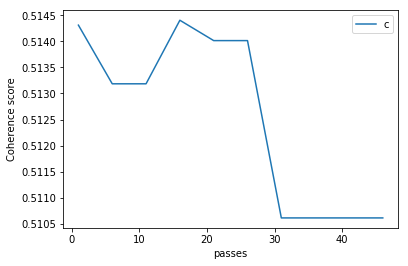

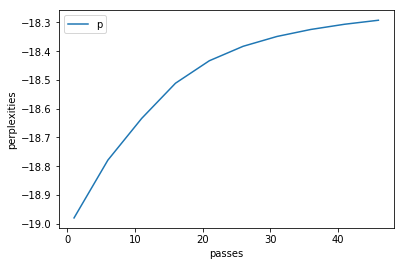

In [201]:
# Show graph
limit=50; start=1; step=5;
x = range(start, limit, step)
plt.plot(x, coherences)
plt.xlabel("passes")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()


# Show graph
limit=50; start=1; step=5;
x = range(start, limit, step)
plt.plot(x, perplexities)
plt.xlabel("passes")
plt.ylabel("perplexities")
plt.legend(("perplexities_values"), loc='best')
plt.show()

In [204]:
# 최적의 passes는? -> p = 10
p = 20


# 최적의 토픽의 갯수는??


coherencesT=[]
perplexitiesT=[]
warnings.filterwarnings('ignore')

for i in range(10):
    if i==0:
        ntopics = 2
    else:
        ntopics = 10*i
    nwords = 100
    #tic = time.time()
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=ntopics,  # 이건 나중에 그래프로 판단해보자!!!
                                           random_state=100,
                                           update_every=1,
                                           chunksize=1000,
                                           passes=p,
                                           alpha='auto',
                                           per_word_topics=True)
    
    #print('ntopics',ntopics,time.time() - tic)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=lemmatized, dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    print("Coherence",coherence_lda)
    coherencesT.append(coherence_lda)
    print('Perplexity: ', lda_model.log_perplexity(corpus),'\n\n')
    perplexitiesT.append(lda_model.log_perplexity(corpus))
    


Coherence 0.5093351402069528
Perplexity:  -8.967968626843906 


Coherence 0.4289377818518544
Perplexity:  -9.999942117504464 


Coherence 0.5140131834871342
Perplexity:  -18.433312910141865 


Coherence 0.5484095838217891
Perplexity:  -23.52517184542657 


Coherence 0.5866952061665556
Perplexity:  -29.085440508104114 


Coherence 0.5786742521173703
Perplexity:  -36.211814284568824 


Coherence 0.5475931632575705
Perplexity:  -45.92832697140689 


Coherence 0.5344232084270881
Perplexity:  -60.21041099072944 


Coherence 0.5316825672987368
Perplexity:  -79.8859617575976 


Coherence 0.5684539594922823
Perplexity:  -93.94748077500708 




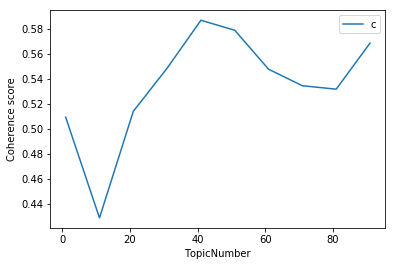

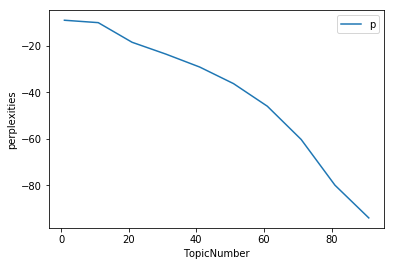

In [207]:
# Show graph
limit=100; start=1; step=10;
x = range(start, limit, step)
plt.plot(x, coherencesT)
plt.xlabel("TopicNumber")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()


# Show graph
limit=100; start=1; step=10;
x = range(start, limit, step)
plt.plot(x, perplexitiesT)
plt.xlabel("TopicNumber")
plt.ylabel("perplexities")
plt.legend(("perplexities_values"), loc='best')
plt.show()

In [208]:
#  최적의 토픽의 수는 50으로 결정!!


# 최적의 모델은?
p = 20
ntopics = 40
    
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=ntopics,  # 이건 나중에 그래프로 판단해보자!!!
                                           random_state=100,
                                           update_every=1,
                                           chunksize=1000,
                                           passes=p,
                                           alpha='auto',
                                           per_word_topics=True)

In [209]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -29.085440508104114

Coherence Score:  0.5866952061665556


In [210]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(25,
  '0.137*"close" + 0.090*"food" + 0.069*"sale" + 0.050*"youth" + '
  '0.047*"cairns" + 0.030*"martin" + 0.027*"wool" + 0.027*"edge" + '
  '0.026*"score" + 0.025*"gang"'),
 (6,
  '0.169*"shoot" + 0.083*"anti" + 0.077*"festival" + 0.052*"investment" + '
  '0.049*"pass" + 0.048*"key" + 0.045*"social" + 0.030*"bishop" + '
  '0.029*"footage" + 0.024*"crackdown"'),
 (12,
  '0.066*"rain" + 0.064*"mark" + 0.059*"gun" + 0.057*"emergency" + '
  '0.053*"bail" + 0.042*"terror" + 0.041*"suicide" + 0.037*"likely" + '
  '0.036*"seize" + 0.033*"unveil"'),
 (14,
  '0.083*"coal" + 0.078*"hear" + 0.078*"land" + 0.069*"challenge" + '
  '0.062*"syrian" + 0.058*"media" + 0.045*"kid" + 0.038*"forecast" + '
  '0.037*"sales" + 0.036*"phone"'),
 (11,
  '0.101*"public" + 0.086*"push" + 0.070*"save" + 0.060*"crop" + 0.058*"deny" '
  '+ 0.048*"history" + 0.036*"safe" + 0.032*"nurse" + 0.032*"transport" + '
  '0.023*"space"'),
 (15,
  '0.141*"jail" + 0.097*"residents" + 0.076*"tell" + 0.074*"sentence" + '
  '

In [211]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis
# 이미지 열기
#im = Image.open('/Users/moon-il/Desktop/스크린샷 2019-06-08 오전 6.32.51.png')
#im

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
0      0.282715  0.304311       1        1  3.571533
16     0.056315 -0.030712       2        1  3.250644
33     0.089330 -0.063020       3        1  3.239673
5      0.033415 -0.015505       4        1  3.220122
34     0.160211 -0.287767       5        1  3.188123
1      0.076608 -0.048388       6        1  2.959719
36     0.040284 -0.019601       7        1  2.904675
2      0.006713 -0.002359       8        1  2.896087
17     0.055864 -0.030367       9        1  2.887962
24     0.031359 -0.014351      10        1  2.858068
31     0.041665 -0.020555      11        1  2.854827
21     0.014103 -0.005635      12        1  2.826928
13     0.003719 -0.001148      13        1  2.802939
8     -0.008373  0.003562      14        1  2.772950
22     0.040595 -0.019836      15        1  2.764919
29     0.010061 -0.003812      16        1  2.749382
7      0.074624 -0.046413      17        1  2.739788
18    -0.017036  0.006614      18        1  2.673026
39    -0.029258  0.010457      19        1  2.513660
4     -0.039191  0.013254      20        1  2.512614
20    -0.029381  0.010500      21        1  2.504185
38     0.060398 -0.033747      22        1  2.499910
3     -0.045253  0.014806      23        1  2.420944
9     -0.034404  0.011967      24        1  2.405083
27    -0.021926  0.008196      25        1  2.383529
37    -0.057324  0.017722      26        1  2.317256
10    -0.054711  0.017145      27        1  2.275571
28    -0.023839  0.008783      28        1  2.270974
32    -0.047543  0.015386      29        1  2.224848
23    -0.037693  0.012838      30        1  2.164093
30    -0.055060  0.017157      31        1  2.160997
19    -0.036382  0.012454      32        1  2.119462
35    -0.054620  0.017113      33        1  2.035382
26    -0.063592  0.019082      34        1  1.924962
15    -0.056323  0.017460      35        1  1.899033
11    -0.067998  0.019967      36        1  1.842656
14    -0.070192  0.020365      37        1  1.760821
12    -0.071242  0.020584      38        1  1.659032
6     -0.075349  0.021288      39        1  1.531082
25    -0.081289  0.022202      40        1  1.412539, topic_info=     Category         Freq          Term        Total  loglift  logprob
term                                                                   
248   Default  2282.000000        sydney  2282.000000  30.0000  30.0000
138   Default  2156.000000           nsw  2156.000000  29.0000  29.0000
466   Default  2400.000000        charge  2400.000000  28.0000  28.0000
194   Default  2200.000000     christmas  2200.000000  27.0000  27.0000
219   Default  2259.000000           win  2259.000000  26.0000  26.0000
500   Default  2183.000000          plan  2183.000000  25.0000  25.0000
295   Default  2092.000000    government  2092.000000  24.0000  24.0000
836   Default  1851.000000            us  1851.000000  23.0000  23.0000
203   Default  1692.000000        change  1692.000000  22.0000  22.0000
235   Default  1543.000000         woman  1543.000000  21.0000  21.0000
759   Default  1581.000000          west  1581.000000  20.0000  20.0000
619   Default  1578.000000         coast  1578.000000  19.0000  19.0000
451   Default  1529.000000          warn  1529.000000  18.0000  18.0000
1     Default  1493.000000           qld  1493.000000  17.0000  17.0000
331   Default  1509.000000        market  1509.000000  16.0000  16.0000
1327  Default  1478.000000          fund  1478.000000  15.0000  15.0000
769   Default  1483.000000          face  1483.000000  14.0000  14.0000
365   Default  1404.000000         death  1404.000000  13.0000  13.0000
1436  Default  1227.000000         paris  1227.000000  12.0000  12.0000
1487  Default  1312.000000        former  1312.000000  11.0000  11.0000
2171  Default  1237.000000      november  1237.000000  10.0000  10.0000
253   Default  1158.000000      canberra  1158.000000   9.0000   9.0000
127